In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

# Pytorch Workflow

exploring [pytorch](https://pytorch.org)
from udemy course pytoch for Deep Learning Bootcamp

In [3]:
what_is_covered = {1: "data (preparing and loading)",
                   2: "build Model",
                   3: "training model or fitting the model to the data",
                   4: "make predictions and evaluating and a model", 
                   5: "save and load model", 
                   6: "putting it all together"}
what_is_covered

{1: 'data (preparing and loading)',
 2: 'build Model',
 3: 'training model or fitting the model to the data',
 4: 'make predictions and evaluating and a model',
 5: 'save and load model',
 6: 'putting it all together'}

In [4]:
## Neural Network

from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.0+cu124'

## 1. Data (preparing and loading)

data can be anything in machine learning

most popular data
* Excel spreadsheet
* Images
* Videos
* Audio
* Text

Machine Learning is a game
1. Get data into a numerical representation.
2. build a model to learn patterns in the numerical rep.

to showcase, lets create the following data using linear regression formula

Y = a + bX

In [5]:
# Create known parameters

weight  = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10], len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test set

create a training and test set with our data

In [6]:
# create train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

Visualize data

data explorer motto :
visualize, visualize, visualize


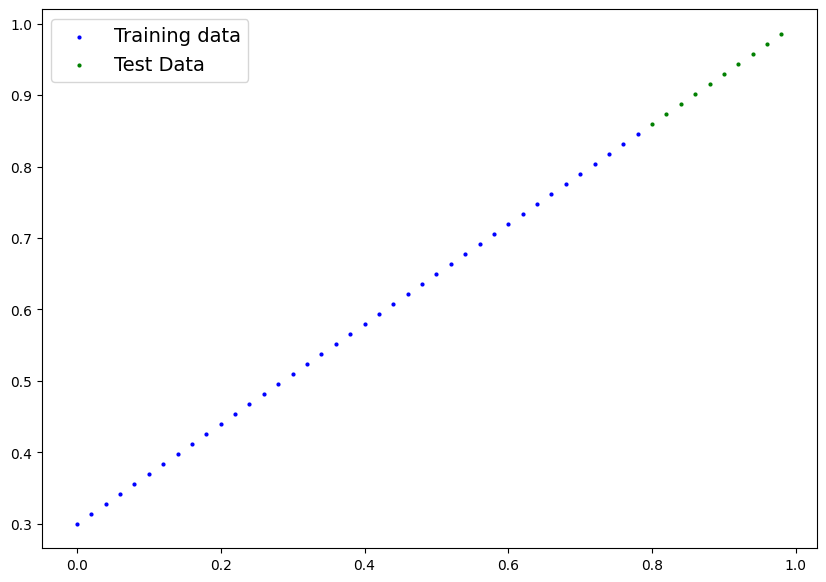

In [7]:
def plot_predictions(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    predictions=None):
    
    # set up plot
    plt.figure(figsize=(10, 7))
    
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    #plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Test Data")

    # apakah ada prediksi?
    if predictions is not None:
        # plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    # show legends
    plt.legend(prop={"size":14})
    plt.show()

plot_predictions()

## 2. Build Model

first pytoch model

what our model does:
* start from random values (weight and bias)
* look at training data and adjust the random values to better represent or get closer to the ideal values

how does it do so?

through two main algorithms:
1. gradient descend
2. backpropagation

In [8]:
# Create a linear reggression model class
import torch.nn as nn

class LinearReggressionModel(nn.Module): # almost everything in Pytorch inherits nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # start with random values
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, # started with random values
                                            requires_grad=True,
                                            dtype=torch.float))

    # Foward untuk menjelaskan komputasi dalam model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" adalah input data
        return self.weights * x + self.bias

### Pytorch model building essentials

* torch.nn - all of computational neural networks
* torch.nn.parameters - what parameters should our model try and learn, often pytorch layer from torch.nn
* torch.nn.module - the base class for all neural network modules, if you subclass it, you should overwrite foward
* torch.optim - pytorch optimizer, same as optimizer in tensorflow
* def foward - all nn.modules subclasses require to overwrite foward, this defines what happens in the foward computation

### cek model pytorch

lihat isi dari model pytorch ini

bisa cek parameter atau apa isi dari model pake .parameters()

In [9]:
# create random seed
torch.manual_seed(42)

# create instance dari model (subclass nn.module)
model_0 = LinearReggressionModel()

# cek parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# list named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### buat prediksi tanpa training, ini bisa di pytorch tidak di tensorflow

cek predictive power dari model tersebut, prediksi y_test berdasarkan x_test

pass data lewat model kita, lewat method foward

In [11]:
# make prediksi with model

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

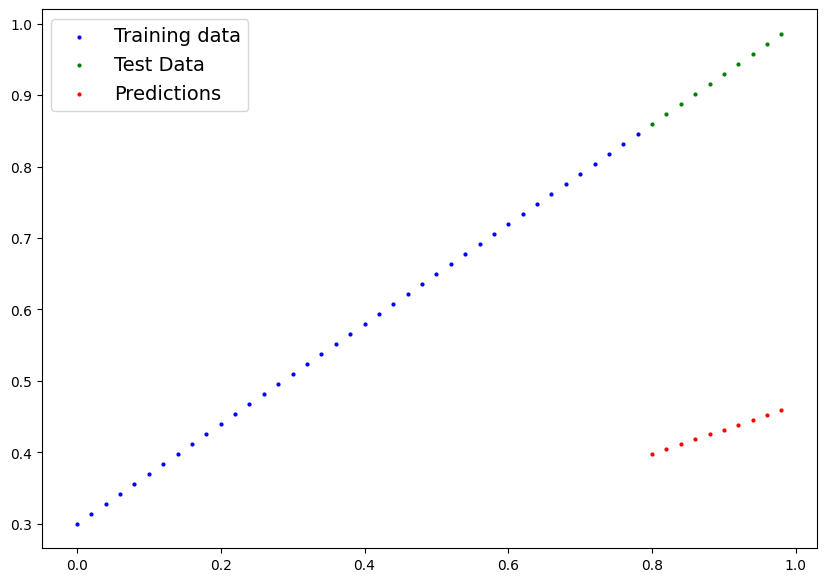

In [13]:
plot_predictions(predictions=y_preds)

hasilnya shocking wkwk

## 3. Train model

ya model training lah ya, biar nilai prediksinya bagus

pake loss function atau cost function atau criterion. buat ini bakalan di sebut loss function

hal yang perlu di training
* loss function
* optimizer

untuk training dibutuhkan
* training loop
* testing loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (pake SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

### Bikin Training Loop Pytorch dan testing loop

beberapa yang dibutuhin untuk training loop:
1. Loop through the data
2. Foward pass (masukin data lewat forward func)
3. calculate the loss (compare forward pass predictions to ground truth labels)
4. optimizer zero grad
5. loss backward - move backwards through the network to calculate the gradients of the parameter from our model with respect to the loss (Backpropagation)
6. optimizer step - use optimizer for improve the loss (gradient descent)

In [17]:
torch.manual_seed(42)
# epoch adalah looping through the data, epochs adalah hyperparameter
epochs = 1000

# track 
epoch_count = []
loss_values = []
test_loss_values = []

## training
# 1. loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in pytorch set all parameters that require gradients
    # 2. forward pass
    y_pred = model_0(X_train)
    # 3. calculate loss
    loss = loss_fn(y_pred, Y_train)
    # 4. optimizer zero grad
    optimizer.zero_grad()
    # 5. perform backpropagation on the loss with respect to the parameter of the model
    loss.backward()
    # 6. step the optimizer untuk perform gradient descent
    optimizer.step()

    ## testing code
    model_0.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_pred = model_0(X_test)
        # 2. calculate loss
        test_loss = loss_fn(test_pred, Y_test)
        
    #print semua biar tau
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Epoch: 10 | Loss: 0.3013603389263153 | Test Loss: 0.4797181189060211
OrderedDict([('weights', tensor([0.3410])), ('bias', tensor([0.1398]))])
Epoch: 20 | Loss: 0.28983938694000244 | Test Loss: 0.4662471413612366
OrderedDict([('weights', tensor([0.3449])), ('bias', tensor([0.1498]))])
Epoch: 30 | Loss: 0.2783183455467224 | Test Loss: 0.4527761936187744
OrderedDict([('weights', tensor([0.3488])), ('bias', tensor([0.1598]))])
Epoch: 40 | Loss: 0.26679736375808716 | Test Loss: 0.43930521607398987
OrderedDict([('weights', tensor([0.3527])), ('bias', tensor([0.1698]))])
Epoch: 50 | Loss: 0.2552763819694519 | Test Loss: 0.4258342385292053
OrderedDict([('weights', tensor([0.3566])), ('bias', tensor([0.1798]))])
Epoch: 60 | Loss: 0.24375538527965546 | Test Loss: 0.41236335039138794
OrderedDict([('weights', tensor([0.3605])), ('bias', tensor([0.1898]))])
E

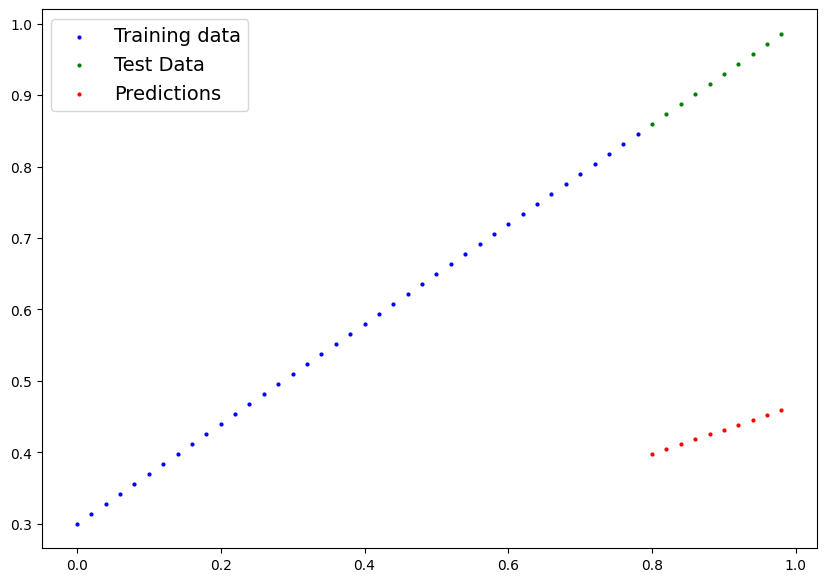

In [18]:
plot_predictions(predictions=y_preds)

In [19]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

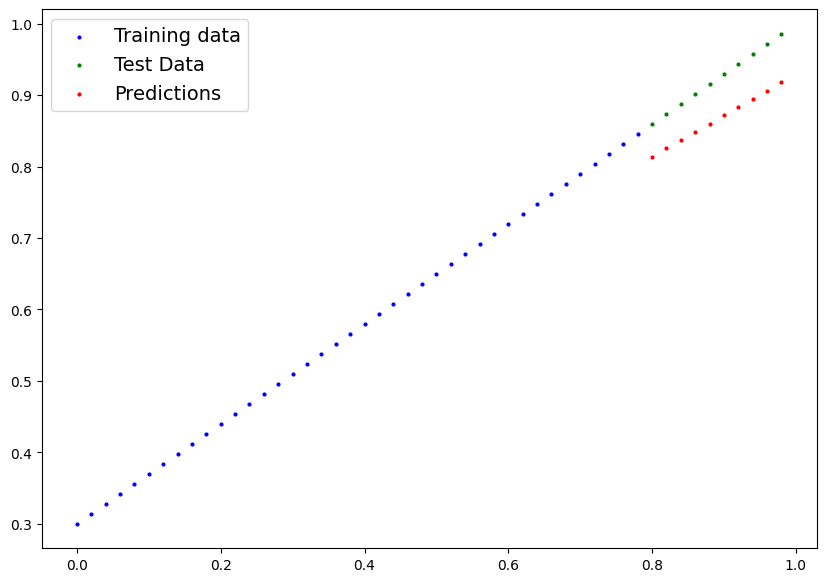

In [20]:
plot_predictions(predictions=y_preds_new)

In [21]:
import numpy as np

In [22]:
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.30136034, 0.2898394 , 0.27831835, 0.26679736,
        0.25527638, 0.24375539, 0.23223439, 0.2207134 , 0.2091924 ,
        0.19767141, 0.1861504 , 0.17462942, 0.16310856, 0.15158771,
        0.14006686, 0.12854603, 0.11702518, 0.10654274, 0.09747618,
        0.08973254, 0.08306285, 0.07729282, 0.07242878, 0.068288  ,
        0.06476505, 0.06174134, 0.05915876, 0.05696033, 0.05514555,
        0.05357731, 0.05218071, 0.05105169, 0.05003031, 0.04916015,
        0.04836021, 0.04769856, 0.04703691, 0.04650094, 0.04599635,
        0.04549176, 0.04501455, 0.04461455, 0.04421454, 0.04381453,
        0.04341452, 0.04301452, 0.0426512 , 0.04230218, 0.04195317,
        0.04160415, 0.04125514, 0.04090612, 0.04055711, 0.04020809,
        0.03985908, 0.03951007, 0.03916105, 0.03881204, 0.03846302,
        0.03811401, 0.03776499, 0.03741598, 0.0370672 , 0.03672432,
        0.03638043, 0.03603694, 0.03569391, 0.03535   , 0.03500668,
        0.03466347, 0.03431956, 0.03397642, 0.03

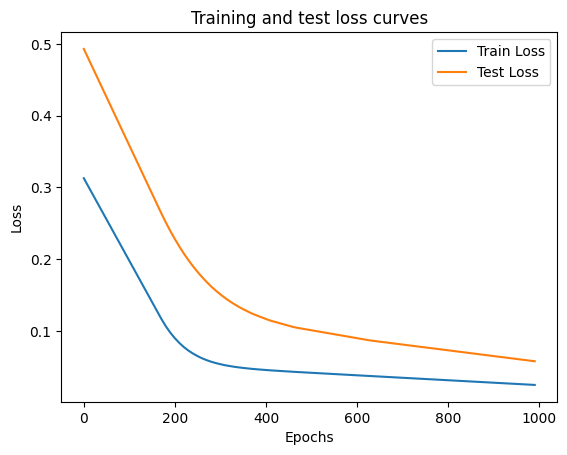

In [23]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a model in pytorch 

3 cara yang perlu diketahui untuk saving and loading models di pytorch
1. `torch.save()` - save pytoch object in Python pickle
2. `torch.load()` - load a save pytorch object
3. `torch.nn.Module.load_state_dict()` - load model's saved state dictionary

In [24]:
# saving our pytorch model
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = '01_Pytorch_Workflow_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. safe a model state_dict
print(f'saving model state dict to {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


saving model state dict to models\01_Pytorch_Workflow_0.pth


In [25]:
# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = '01_Pytorch_Workflow_0_entire model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 4. save entire model
print(f'saving entire model to {MODEL_SAVE_PATH}')
torch.save(model_0, MODEL_SAVE_PATH)

saving entire model to models\01_Pytorch_Workflow_0_entire model.pth


## loading a saved model

using load from state dict and entire model
create a new instance and load the saved state_dict

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [27]:
# To load in a saved state dict, buat new instance of our model class
loaded_dict_model_0 = LinearReggressionModel()

SAVED_DICT_MODEL_0 = "./models/01_Pytorch_Workflow_0.pth"
# load the saved state_dict of model_0
loaded_dict_model_0.load_state_dict(torch.load(f=SAVED_DICT_MODEL_0))

C:\Users\ibnuk\AppData\Local\Temp\ipykernel_16144\675015869.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_dict_model_0.load_state_dict(torch.load(f=SAVED_DICT_M

<All keys matched successfully>

In [28]:
# make some predictions with our loaded model

loaded_dict_model_0.eval()
with torch.inference_mode():
    loaded_model_predictions = loaded_dict_model_0(X_test)

loaded_model_predictions

tensor([[0.8140],
        [0.8255],
        [0.8371],
        [0.8487],
        [0.8603],
        [0.8718],
        [0.8834],
        [0.8950],
        [0.9066],
        [0.9181]])

In [29]:
# compare loaded model preds with originial model preds
y_preds_new == loaded_model_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

tulis ulang dan see it all in one place

In [32]:
# import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# cek pytorch version
torch.__version__

'2.4.0+cu124'

create device-agnostic code

check if gpu is available and use it

In [34]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using device: {device}')

Using device: cuda


### 6.1 Data

In [96]:
# create some data using the linear regression of y = weight * X + bias
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create x and y (features and labels)

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [97]:
# split data
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

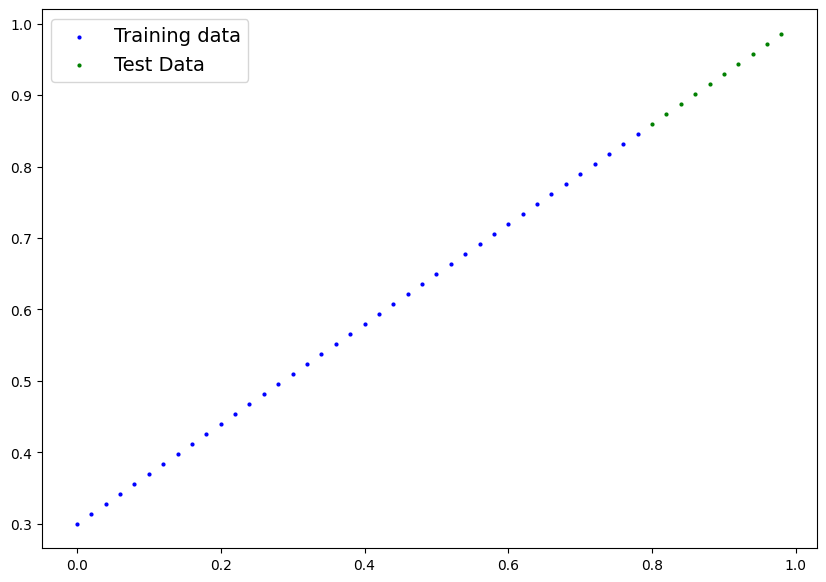

In [98]:
# plot the data
plot_predictions(X_train.cpu(), Y_train.cpu(), X_test.cpu(), Y_test.cpu())

### 6.2 Building a pytorch linear model

this linear model i will take from my bangkit simulasi tensorflow developer certificate and i will implement it into tensorflow code for practice

In [99]:
# create a linear model subclass nn.Module
class LinearModelLikeTensorflow(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.Linear
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

torch.manual_seed(42)
model_1 = LinearModelLikeTensorflow()
model_1, model_1.state_dict()

(LinearModelLikeTensorflow(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear.weight', tensor([[0.7645]])),
              ('linear.bias', tensor([0.8300]))]))

In [100]:
#check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [101]:
# set the mode to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

for training we need
- loss function
- optimizer
- training loop
- testing loop

In [102]:
# setup loss function
loss_function = nn.L1Loss() 

# setup optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

In [103]:
# training loop
torch.manual_seed(42)

epochs = 200

# put the data in target device (agnostic code for data)
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    # 1. forward pass
    y_pred = model_1(X_train)
    # 2. loss
    loss = loss_fn(y_pred, Y_train)
    # 3. optimizer zero grad
    optimizer.zero_grad()
    # 4. backpropagation
    loss.backward()
    # 5. optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, Y_test)

    # print out what's happening

    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [104]:
weight, bias

(0.7, 0.3)

In [105]:
model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 making and Evaluating Predictions

In [106]:
# turn model into eval mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

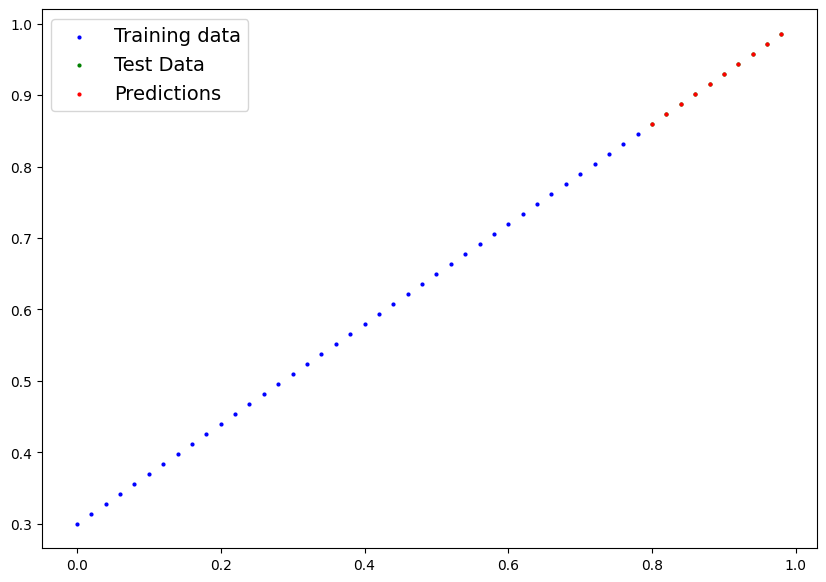

In [107]:
y_preds = y_preds.cpu()

# checkout our model predictions visually
plot_predictions(predictions=y_preds)

### 6.5 Saving and Loading a trained Model

In [110]:
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = '01_Pytorch_Workflow_Model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save entire model
print(f'saving entire model to {MODEL_SAVE_PATH}')
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

saving entire model to models\01_Pytorch_Workflow_Model_1.pth


In [111]:
# To load in a saved state dict, buat new instance of our model class
loaded_model_1 = LinearModelLikeTensorflow()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load("./models/01_Pytorch_Workflow_Model_1.pth"))

# put the loaded model to the device
loaded_model_1.to(device)

C:\Users\ibnuk\AppData\Local\Temp\ipykernel_16144\638909094.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load("./models/01_Pytorc

LinearModelLikeTensorflow(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [112]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [113]:
loaded_model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear.bias', tensor([0.3025], device='cuda:0'))])

In [115]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# 01 Section CLEAR, Congrats
Now on to the exercises